## Prediction of user engagement

Prediction of user engagement

The data is available as two attached CSV files:

takehome_user_engagement.csv takehome_users.csv The data has the following two tables:

A user table ("takehome_users") with data on 12,000 users who signed up for the product in the last two years. This table includes: name: the user's name object_id: the user's id email: email address creation_source: how their account was created. This takes on one of 5 values: PERSONAL_PROJECTS: invited to join another user's personal workspace GUEST_INVITE: invited to an organization as a guest (limited permissions) ORG_INVITE: invited to an organization (as a full member) SIGNUP: signed up via the website SIGNUP_GOOGLE_AUTH: signed up using Google Authentication (using a Google email account for their login-id) creation_time: when they created their account last_session_creation_time: unix timestamp of last login opted_in_to_mailing_list: whether they have opted into receiving marketing emails enabled_for_marketing_drip: whether they are on the regular marketing email drip org_id: the organization (group of users) they belong to invited_by_user_id: which user invited them to join (if applicable).

A usage summary table ("takehome_user_engagement") that has a row for each day that a user logged into the product.
Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven­day period, identify which factors predict future user adoption.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading Data
engagement_data = pd.read_csv('/Users/amrita/Desktop/takehome_user_engagement.csv')

In [3]:
df = pd.read_csv('/Users/amrita/Desktop/takehome_users.csv', encoding = 'latin')

In [4]:
engagement_data.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [6]:
engagement_data.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [7]:
df.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


We can use the engagement dataframe to identify who log on atleast 3 times in a 7 day period. We can use the main dataframe to identify features that predict if the user will be active.

In [8]:
#users appearing at least 3 times 
engage_users = engagement_data.groupby('user_id').filter(lambda x: len(x) >= 3)
engage_users.reset_index(drop=True, inplace = True)

In [9]:
active = 0
active_users = []
for i in range(len(engage_users)-2):
    user = engage_users['user_id'][i]
    if user != active and user == engage_users['user_id'][i+2]:
        st = pd.Timestamp(engage_users['time_stamp'][i])
        et = st + pd.Timedelta('7D')
        if st < pd.Timestamp(engage_users['time_stamp'][i+1]) < et and st < pd.Timestamp(engage_users['time_stamp'][i+2]) < et:
            active_users.append(user)
            active = user 

In [10]:

len(active_users)

1602

In [11]:
y = pd.Series(np.random.randn(len(df)))
n = 0
for i in range(len(df)):
    if df['object_id'][i] == active_users[n]:
        y[i] = 1
        n = n+1
        if n > len(active_users)-1:
            n = n -1
    else:
        y[i] = 0
y.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
dtype: float64

In [12]:

df1 = pd.DataFrame(y,columns = ['active_users'])

In [13]:

df = pd.concat([df,df1], axis = 1)

In [14]:

df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_users
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


In [15]:
inv = pd.Series(np.random.randn(len(df)))
for i in range(len(df)):
    if df['invited_by_user_id'][i] >=1:
        inv[i] = 1
    else:
        inv[i] = 0
df2 = pd.DataFrame(inv, columns = ['invited'])
df = pd.concat([df,df2], axis = 1)

In [16]:

inv.value_counts()

1.0    6417
0.0    5583
dtype: int64

In [17]:
df['creation_source'].value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [18]:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['ORG_INVITE','GUEST_INVITE','PERSONAL_PROJECTS','SIGNUP','SIGNUP_GOOGLE_AUTH'])

LabelEncoder()

In [19]:
creation = le.transform(df['creation_source'])
df3 = pd.DataFrame(creation,columns = ['creation'])

In [20]:

df = pd.concat([df,df3],axis=1)

In [21]:

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y = df['active_users']
X = df[['creation','last_session_creation_time','opted_in_to_mailing_list','enabled_for_marketing_drip','org_id']]

In [22]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
# fit model to training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

Text(0, 0.5, 'Feature Importance Score')

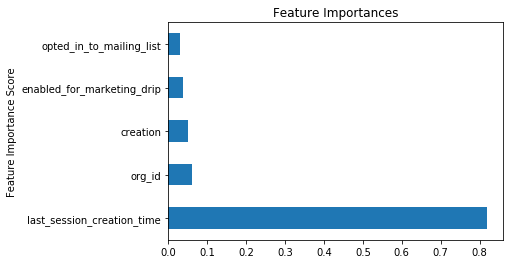

In [23]:

feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_imp.plot(kind='barh', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [24]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.97%



This model has 92% accuracy. The last session creation time is the most important feature for prediction.